Name: Aditya Kamath

Roll no.: C021

Semester: VI

Program: B.Tech

Branch: EXTC

Date of performance: 19/02/2021

Date of Submission: 26/02/2021

Topic: Frequency Domain Filtering

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Reading the image
img= cv2.imread("/content/Fig0333(a)(test_pattern_blurring_orig).tif",0) 
#size of the image
m,n = img.shape
print(m,n)

500 500


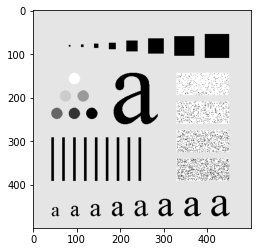

In [ ]:
plt.imshow(img,cmap = 'gray')

In [ ]:
img_fft= np.fft.fft2(img, s=None, axes=(-2, -1), norm=None)  # Apply FFT on origianl image
img_fft= np.fft.fftshift(img_fft)                            # Shifting the origin same as multiplying by (-1)^x+y
img_abs= np.abs(img_fft)                                     # Obtaining magintude of the transformed image
img_phase= np.angle(img_fft)                                 # Obtaining the Phase of the trasnformed image
img_log= np.log10(1+img_abs)                                 # Performing Log transformation

Text(0.5, 1.0, 'Log Transformation of the original image')

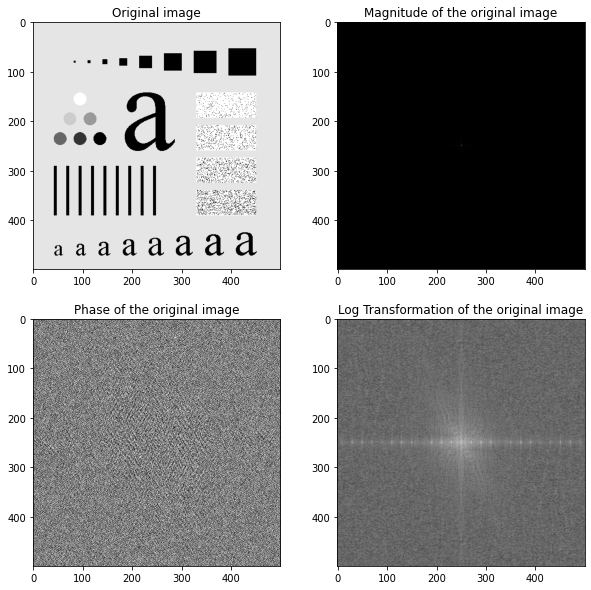

In [ ]:
fig = plt.figure(figsize=(10,10),facecolor='w')
plt.subplot(2,2,1)
plt.imshow(img, cmap="gray") #printing the original image
plt.title("Original image")

plt.subplot(2,2,2)
plt.imshow(img_abs, "gray") #printing the magnitude of the image
plt.title("Magnitude of the original image") 

plt.subplot(2,2,3)
plt.imshow(img_phase, "gray") #printing the phase of the image
plt.title("Phase of the original image")

plt.subplot(2,2,4)
plt.imshow(img_log, "gray") #printing the log transformation of the image
plt.title("Log Transformation of the original image")

In [ ]:
#Obtaining size (rows and columns)of the image
m,n= img_fft.shape
print(m,n)

500 500


Taking Input from users

In [ ]:
# making LPF nad HPF masks

def mask(m,n,size):
    lpf = np.zeros([int(m), int(n)])
    hpf = np.zeros([int(m), int(n)])

    for i in range(m):
        for j in range(n):
            dist = np.sqrt((i-m//2)**2 +(j-n//2)**2)
            if dist > size:
                lpf[i,j]=0
                hpf[i,j]=1
            else:
                lpf[i,j]= 1
                hpf[i,j]=0
    return(lpf,hpf)

Enter size value100


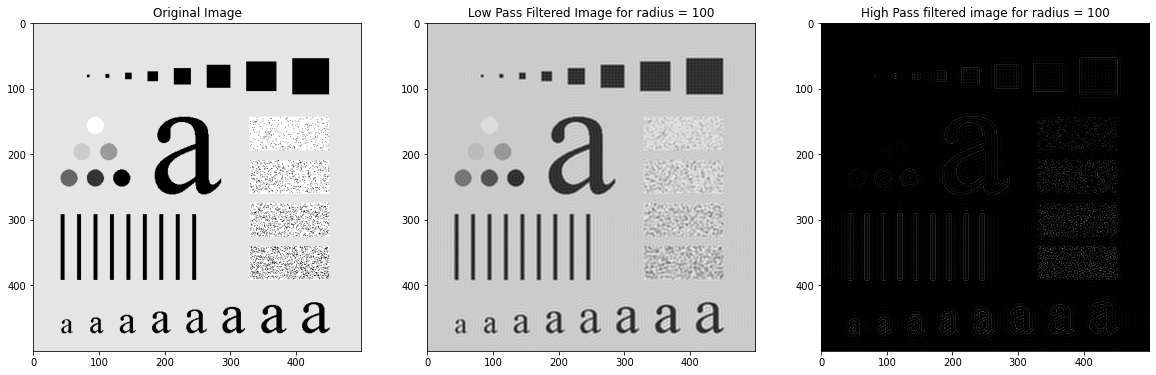

In [ ]:
#multiplying and getting the image after applying filter mask

size=int(input("Enter size value"))
lpf,hpf = mask(m,n,size)
lpf_img = img_fft * lpf
hpf_img = img_fft * hpf

lpf_img = np.fft.fftshift(lpf_img)
hpf_img = np.fft.fftshift(hpf_img)

lpf_img = np.real(np.fft.ifft2(lpf_img))
hpf_img = np.real(np.fft.ifft2(hpf_img))

#Plot orinal, low pass filtered and high pass filtered image
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img,cmap="gray")
plt.subplot(1,3,2)
plt.title("Low Pass Filtered Image for radius = " +str(size))
plt.imshow(lpf_img,cmap="gray")
plt.subplot(1,3,3)
plt.title("High Pass filtered image for radius = " +str(size))
plt.imshow(hpf_img,cmap="gray", vmin=0, vmax=255)

Genralised code


In [ ]:
# making LPF nad HPF masks

def mask(m,n,size):
    lpf = np.zeros([int(m), int(n)])
    hpf = np.zeros([int(m), int(n)])

    for i in range(m):
        for j in range(n):
            dist = np.sqrt((i-m//2)**2 +(j-n//2)**2)
            if dist > size:
                lpf[i,j]=0
                hpf[i,j]=1
            else:
                lpf[i,j]= 1
                hpf[i,j]=0
    return(lpf,hpf)

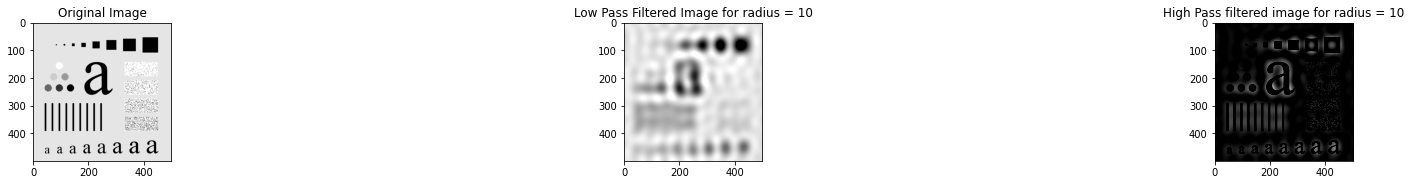

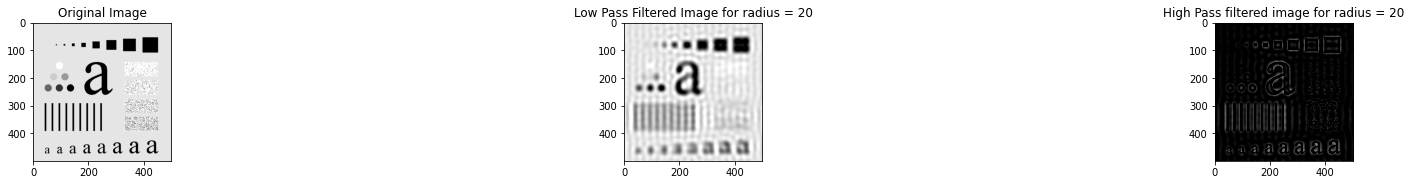

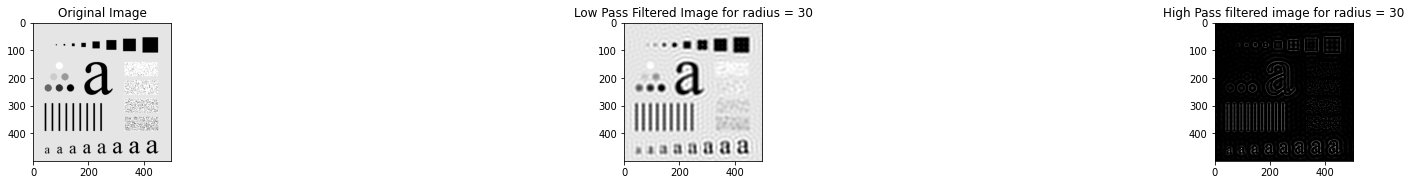

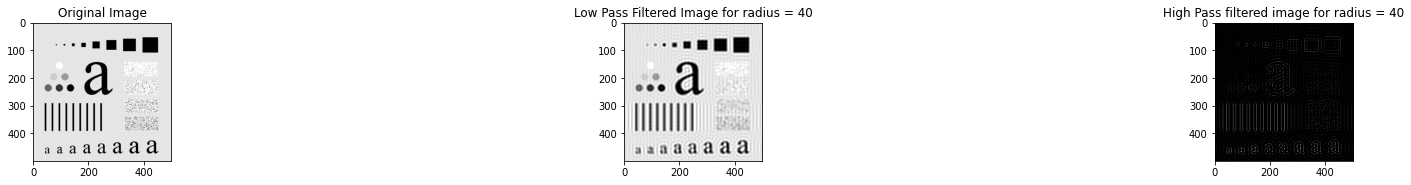

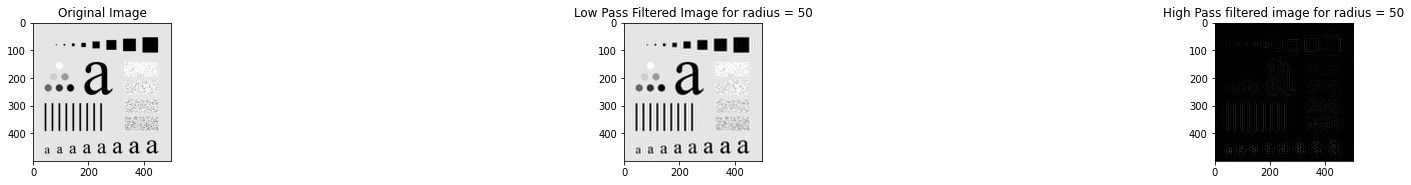

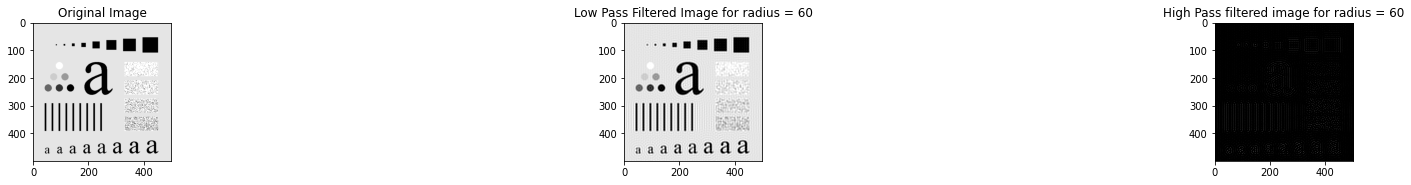

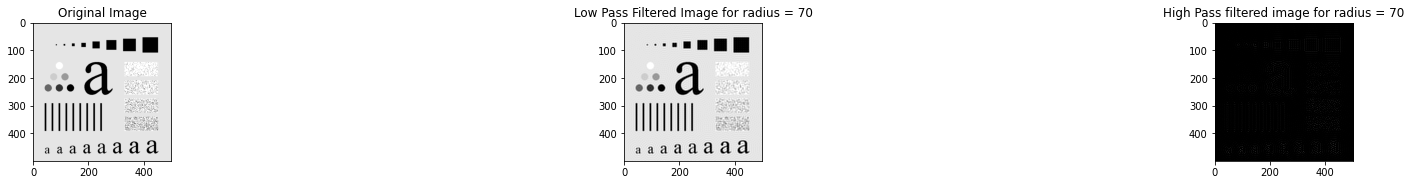

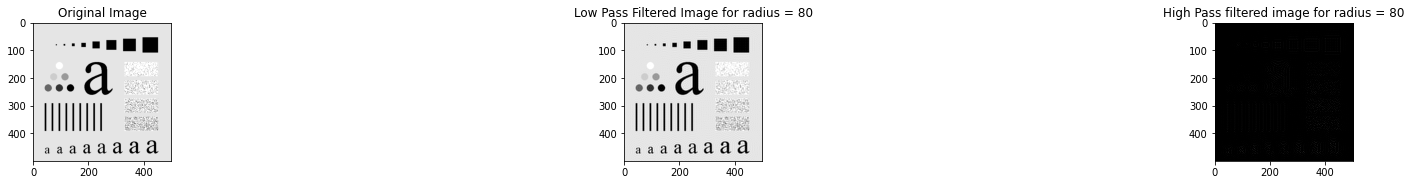

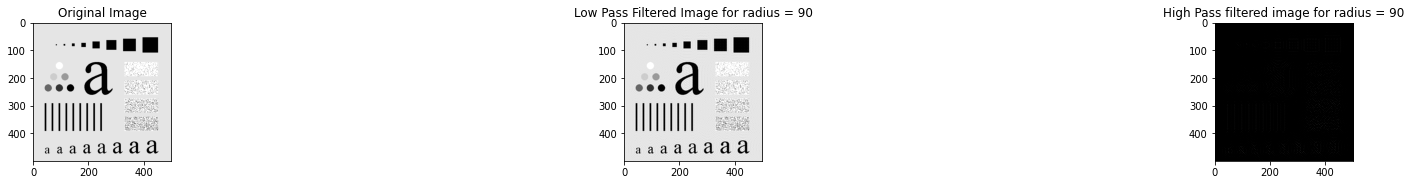

In [ ]:
#multiplying and getting the image after applying filter mask
f = 1

for i in range(10,100,10):
  size= i
  img_new = img_fft  

  lpf,hpf = mask(m,n,size)
  lpf_img = img_new * lpf
  hpf_img = img_new * hpf

  lpf_img = np.fft.fftshift(lpf_img)
  hpf_img = np.fft.fftshift(hpf_img)

  lpf_img = np.real(np.fft.ifft2(lpf_img))
  hpf_img = np.real(np.fft.ifft2(hpf_img))


  plt.figure(figsize=(30,30))
  plt.subplot(10,3,f)
  plt.title("Original Image")
  plt.imshow(img,cmap="gray", vmin=0, vmax=255)
  f=f+1
  plt.subplot(10,3,f)
  plt.title("Low Pass Filtered Image for radius = " +str(size))
  plt.imshow(lpf_img,cmap="gray", vmin=0, vmax=255)
  f=f+1
  plt.subplot(10,3,f)
  plt.title("High Pass filtered image for radius = " +str(size))
  plt.imshow(hpf_img,cmap="gray", vmin=0, vmax=255)
  f=f+1